Timelines of Baby Names

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
yob2000 = pd.read_csv("../names/yob2000.txt", header=None)
amounts = yob2000.iloc[:, 2]
print(sum(amounts))
yob2000.head(5)

3779380


,0,1,2
0,Emily,F,25957
1,Hannah,F,23085
2,Madison,F,19968
3,Ashley,F,17997
4,Sarah,F,17708


In [ ]:
yob2000_list = yob2000.values.tolist()
print(yob2000_list[0:5])
percentage_list = [(i[2] / sum(amounts)) * 100 for i in yob2000_list]
print(percentage_list[0:5])

In [ ]:
yob2000["percentage"] = percentage_list
yob2000.head(5)

,0,1,2,percentage
0,Emily,F,25957,0.686806
1,Hannah,F,23085,0.610814
2,Madison,F,19968,0.528341
3,Ashley,F,17997,0.476189
4,Sarah,F,17708,0.468542


In [5]:
path = "../names/"

In [7]:
df = pd.read_csv(os.path.join(path, 'yob2000.txt'), names=['name', 'gender', 'count'])

df['percentage'] = df['count'] * 100 / df['count'].sum()
df.head()

,name,gender,count,percentage
0,Emily,F,25957,0.686806
1,Hannah,F,23085,0.610814
2,Madison,F,19968,0.528341
3,Ashley,F,17997,0.476189
4,Sarah,F,17708,0.468542


In [16]:
data = []
for year in range(1880, 2022):
    df = pd.read_csv(os.path.join(path, f'yob{year}.txt'), names=['name', 'gender', 'count'])
    df['year'] = year
    data.append(df)
    
df = pd.concat(data, axis=0, ignore_index=True)
df.shape

(2052781, 4)

In [ ]:
import glob
filenames = sorted(glob.glob("../names/yob*.txt"))
# print(filenames)
dfs_v1 = [pd.read_csv(i, names=['name', 'gender', 'count']) for i in filenames]
dfs_v1['year'] = [year for year in range(1880, 2022)]
# dfs_v1 = [i.assign(year=i.name.str.extract('yoby{i}.txt', expand=False)) for i in dfs_v1]
dfs = [i.reset_index(drop=True) for i in dfs_v1]
# print(dfs[0:5])
all_names = pd.concat(dfs, ignore_index=True)
all_names.head(5)
# all_names.shape()

<AxesSubplot:xlabel='year'>

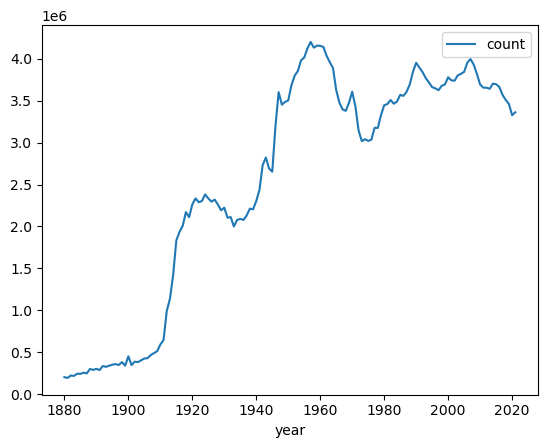

In [17]:
df.groupby('year').sum().plot()

In [18]:
all_years = list(range(1880, 2022))
zeros = [0 for _ in all_years]
empty = pd.Series(zeros, index=all_years, name='count')
empty.head(3)

1880    0
1881    0
1882    0
Name: count, dtype: int64

<AxesSubplot:xlabel='year'>

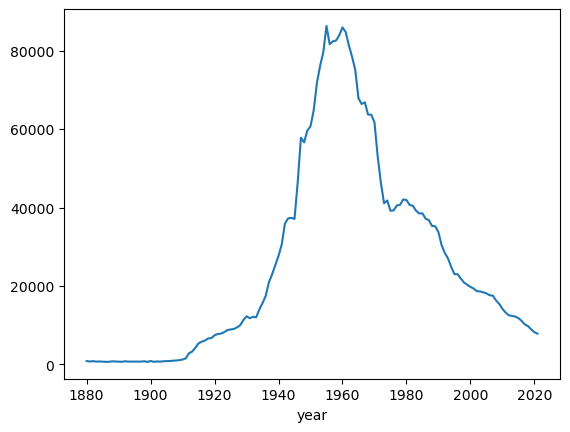

In [19]:
David = df[(df['name'] == 'David') & (df['gender']=='M')]
David.set_index('year', inplace=True)
David = David['count'] + empty
David.fillna(0.0, inplace=True)
David.plot()

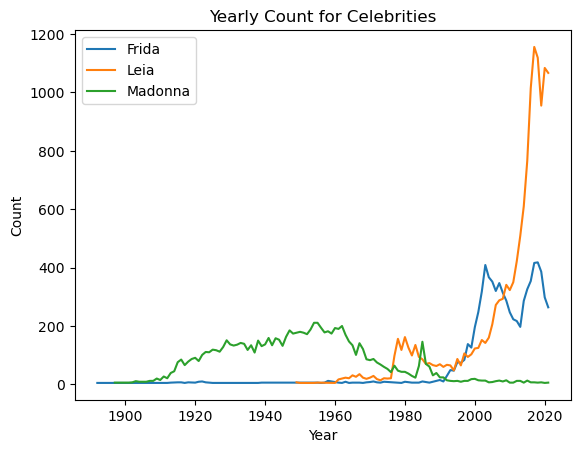

In [23]:
girls = df[df['gender'] == 'F'].set_index('name')

celebrities = girls.loc[['Madonna', 'Frida', 'Leia']]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for name, data in celebrities.groupby('name'):
    ax.plot(data['year'], data['count'], label=name)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Yearly Count for Celebrities')
plt.show()


In [25]:
year_total = df.groupby('year')['count'].sum()
normalized_dataset = David / year_total

<AxesSubplot:xlabel='year'>

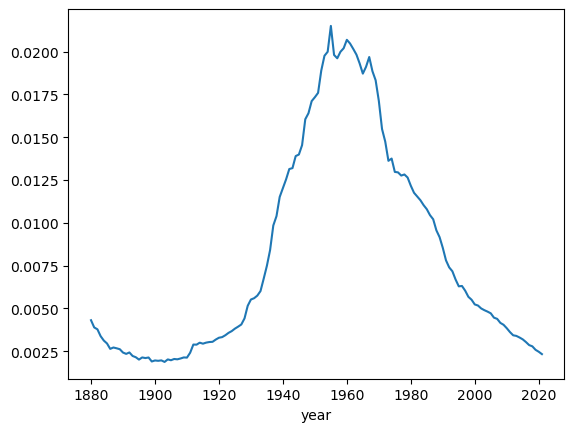

In [26]:
normalized_dataset.plot()

<AxesSubplot:xlabel='year'>

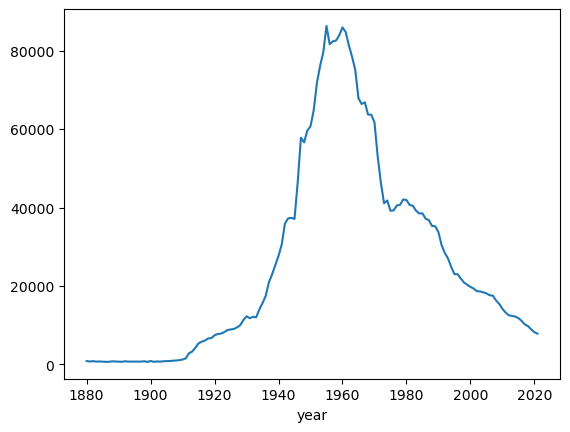

In [27]:
David.plot()